### Importing the neccesary libraries

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import os
import csv
import warnings

### Defining the function which perfroms the Data Cleaning and Clustering

In [8]:
def music_recommender():
        
        raw_data = pd.read_csv('spotify_data.csv')
        #print(raw_data.shape)
        #raw_data = raw_data.iloc[:1000,:]
        #print(raw_data)

        pd.set_option('display.max_columns', None)
        raw_data.info()

        # data cleaning --------------------------------------------------------------------------------------
        nulls = raw_data.isnull().sum()
        #print(nulls)

        training_data = raw_data.drop(['artist_name','popularity','year','genre','Unnamed: 0'], axis=1, inplace=False)

        print(training_data.shape)
        training_data = training_data[training_data.key != -1]
        print("after dropping some rows:\n", training_data.shape)
        print(training_data.head())

        print(training_data.shape)
        print(training_data.duplicated().any())
        training_data.drop_duplicates(inplace=True)
        print(training_data.shape)

        training_data.hist()
        plt.show()

        # this global scalar will be fitted on training data and will be used for both training and test data
        global_scalar = MinMaxScaler()
        id_column = training_data['track_id']
        track_name_column = training_data['track_name']
        training_data.drop(['track_id','track_name'], axis=1, inplace=True)
        global_scalar.fit(training_data)
        training_data = pd.DataFrame(global_scalar.transform(training_data),
                                     index=training_data.index,
                                     columns=training_data.columns)
        

        training_data.hist()
        plt.show()

        training_data.info()

        corr = training_data.corr()
        sns.heatmap(corr[corr > 0.1], cmap="Blues", annot=True)
        plt.show()

        ## End of data visualisation...
        
        # run block of code and catch warnings
        with warnings.catch_warnings():
            # ignore all caught warnings
            warnings.filterwarnings("ignore")
            # execute code that will generate warnings
            # clustering(Using K means clustering)----------------------------------------------------------------------------------------
            training_data['track_id'] = id_column
            training_data['track_name'] = track_name_column 
            wcss = []
            for i in range(1, 20):
                kmeans = KMeans(i)
                kmeans.fit(training_data.drop(['track_id','track_name'], axis=1, inplace=False))
                wcss_iter = kmeans.inertia_
                wcss.append(wcss_iter)
    
            number_clusters = range(1, 20)
            plt.plot(number_clusters, wcss)
            plt.title('The Elbow title')
            plt.xlabel('Number of clusters')
            plt.ylabel('SSE')
            plt.show()
    
            kmeans = KMeans(n_clusters=10,n_init = 10)
            training_data_clustered = kmeans.fit(training_data.drop(['track_id','track_name'], axis=1, inplace=False))
            training_data["cluster"] = training_data_clustered.labels_
            centroids = training_data_clustered.cluster_centers_
            print(training_data.head())
    
            #static input
            userPreferences = pd.read_csv("input_tracks.csv")
            
            # making output...........................................................................................
            userPreferences.drop(userPreferences.columns.difference(["danceability", "energy", "key", "loudness", "mode",
                                                                     "speechiness", "acousticness", "instrumentalness",
                                                                     "liveness", "valence", "tempo", "duration_ms",
                                                                     "time_signature"]), axis = 1, inplace=True)
    
            # input normalizing
            userPreferences = pd.DataFrame(global_scalar.transform(userPreferences),
                                           index=userPreferences.index,
                                           columns=userPreferences.columns)
    
            fields = ["track_id", "track_name", "cluster"]
    
            # single playlist
            single_playlist = []
            for i in range(20):
                cluster_index = (training_data_clustered.predict(userPreferences.iloc[[i]]))[0]
                print(cluster_index)
                cluster_songs = training_data[training_data.cluster == cluster_index]
                cluster_songs.drop(cluster_songs.columns.difference(["track_id" , "track_name" , "cluster"]), axis = 1, inplace=True)
                single_playlist.append((cluster_songs.sample()).values.flatten().tolist())
                print(single_playlist[i])
    
            filename = "single_playlist.csv"
    
            # writing to csv file
            with open(filename, 'w') as csvfile:
                # creating a csv writer object
                csvwriter = csv.writer(csvfile)
    
                # writing the fields
                csvwriter.writerow(fields)
    
                # writing the data rows
                csvwriter.writerows(single_playlist)


### Calling the function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

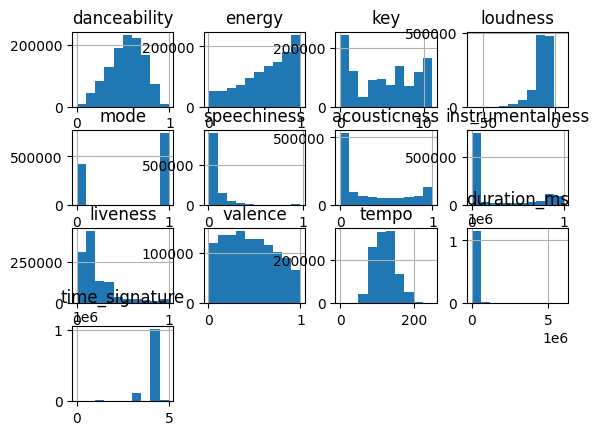

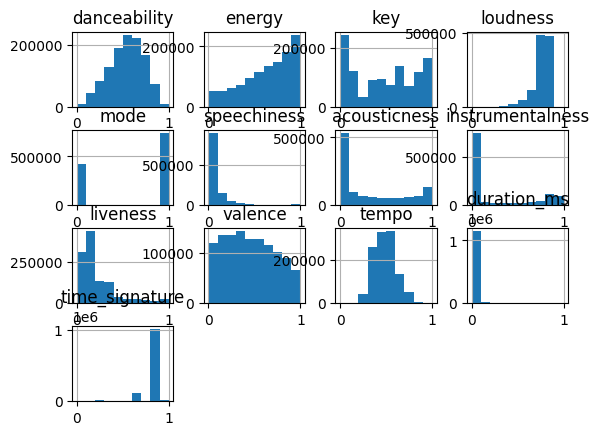

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   danceability      1159764 non-null  float64
 1   energy            1159764 non-null  float64
 2   key               1159764 non-null  float64
 3   loudness          1159764 non-null  float64
 4   mode              1159764 non-null  float64
 5   speechiness       1159764 non-null  float64
 6   acousticness      1159764 non-null  float64
 7   instrumentalness  1159764 non-null  float64
 8   liveness          1159764 non-null  float64
 9   valence           1159764 non-null  float64
 10  tempo             1159764 non-null  float64
 11  duration_ms       1159764 non-null  float64
 12  time_signature    1159764 non-null  float64
dtypes: float64(13)
memory usage: 115.0 MB


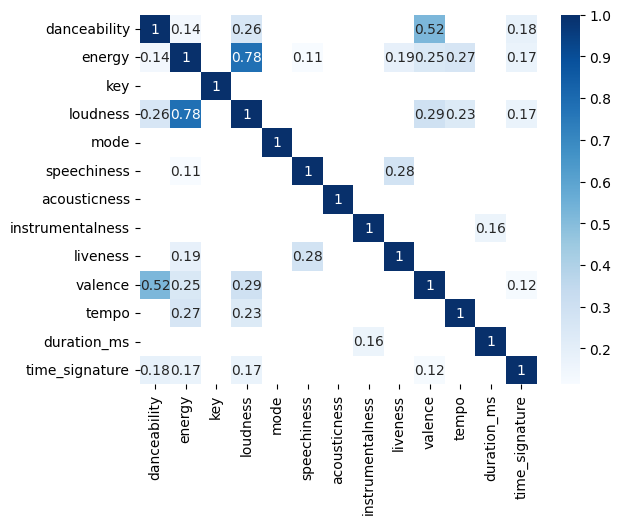

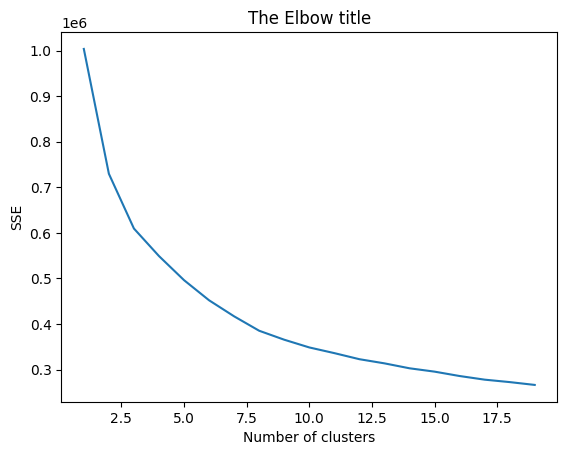

   danceability  energy       key  loudness  mode  speechiness  acousticness  \
0      0.486405   0.303  0.363636  0.747479   1.0     0.044181      0.696787   
1      0.576032   0.454  0.272727  0.743932   1.0     0.026571      0.478916   
2      0.411883   0.234  0.272727  0.690643   1.0     0.033265      0.339357   
3      0.394763   0.251  0.909091  0.750794   1.0     0.037384      0.810241   
4      0.433031   0.791  0.545455  0.819657   0.0     0.031102      0.072892   

   instrumentalness  liveness  valence     tempo  duration_ms  time_signature  \
0          0.000000    0.1150    0.139  0.533639     0.039693             0.6   
1          0.000014    0.0974    0.515  0.560744     0.035728             0.8   
2          0.000050    0.0895    0.145  0.559344     0.026155             0.8   
3          0.000000    0.0797    0.508  0.819867     0.050383             0.8   
4          0.019300    0.1100    0.217  0.687475     0.040385             0.8   

                 track_id       

In [12]:
music_recommender()